# Natural Language Processing

### Understanding TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF is a statistical measure used in Natural Language Processing (NLP) to determine the importance of a word (term) in a document relative to a collection of documents (corpus). It helps identify words that are important for distinguishing one document from others.

#### Formula:
The TF-IDF score for a term \(x\) in a document \(y\) is calculated as:

\[
W_{x,y} = TF_{x,y} \cdot \log\left(\frac{N}{DF_x}\right)
\]

Where:
- \(W_{x,y}\): TF-IDF score of term \(x\) in document \(y\)
- \(TF_{x,y}\): **Term Frequency** — how often the term \(x\) appears in document \(y\)
- \(N\): Total number of documents in the corpus
- \(DF_x\): **Document Frequency** — the number of documents containing the term \(x\)

---

#### Components:
1. **Term Frequency (TF):**
   Measures the frequency of the term in the document:
   \[
   TF_{x,y} = \frac{\text{Frequency of } x \text{ in } y}{\text{Total terms in document } y}
   \]In [28]: from sklearn.feature_extraction.text import CountVectorizerIn [28]: from sklearn.feature_extraction.text import CountVectorizer

2. **Inverse Document Frequency (IDF):**
   Penalizes common terms that appear across many documents. Rarer terms are given higher weight:
   \[
   IDF_x = \log\left(\frac{N}{DF_x}\right)
   \]

---

#### Why This Formula Works:
1. **TF measures local importance**:
   Words that occur frequently in a document are likely important for that specific document.

2. **IDF measures global importance**:
   Common words (e.g., "the", "is", "and") appear in many documents and are less useful for distinguishing between them. IDF reduces their importance.

3. **Combining TF and IDF**:
   Multiplying \(TF\) and \(IDF\) ensures that a word is considered important only if it is frequent in a specific document and rare across the entire corpus.

---

#### Intuitive Example:
Consider two words in a corpus of movie reviews: **"great"** and **"movie"**.
- "great" appears frequently in a few specific reviews → **high TF, high IDF → important**.
- "movie" appears in almost all reviews → **high TF, low IDF → less important**.

TF-IDF ensures that "great" is assigned a higher weight because it is unique to certain documents, while "movie" gets a lower weight because it is common to all documents.

---

TF-IDF is widely used in:
- Keyword extraction
- Text classification
- Document similarity
- Information retrieval


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.pyplot inline

UsageError: Line magic function `%matplotlib.pyplot` not found.


In [11]:
import nltk

In [15]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  l



Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-80 Data Files
  [ ] city_database....... City

Hit Enter to continue:  


  [ ] comtrans............ ComTrans Corpus Sample
  [ ] conll2000........... CONLL 2000 Chunking Corpus
  [ ] conll2002........... CONLL 2002 Named Entity Recognition Corpus
  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian........

Hit Enter to continue:  


  [ ] kimmo............... PC-KIMMO Data Files
  [ ] knbc................ KNB Corpus (Annotated blog corpus)
  [ ] large_grammars...... Large context-free and feature-based grammars
                           for parser comparison
  [ ] lin_thesaurus....... Lin's Dependency Thesaurus
  [ ] mac_morpho.......... MAC-MORPHO: Brazilian Portuguese news text with
                           part-of-speech tags
  [ ] machado............. Machado de Assis -- Obra Completa
  [ ] masc_tagged......... MASC Tagged Corpus
  [ ] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_ne_chunker_tab ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [ ] maxent_treebank_pos_tagger_tab Treebank Part of Speech Tagger (Maximum entropy)
  [ ] moses_sample........ Moses Sample Models
  [ ] movie_reviews....... Sentiment Polarity Dataset Version 2.0
  [ ] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.

Hit Enter to continue:  


  [ ] nps_chat............ NPS Chat
  [ ] omw-1.4............. Open Multilingual Wordnet
  [ ] omw................. Open Multilingual Wordnet
  [ ] opinion_lexicon..... Opinion Lexicon
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] paradigms........... Paradigm Corpus
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] pil................. The Patient Information Leaflet (PIL) Corpus
  [ ] pl196x.............. Polish language of the XX century sixties
  [ ] porter_test......... Porter Stemmer Test Files
  [ ] ppattach............ Prepositional Phrase Attachment Corpus
  [ ] problem_reports..... Problem Report Corpus
  [ ] product_reviews_1... Product Reviews (5 Products)
  [ ] product_reviews_2... Product Reviews (9 Products)
  [ ] propbank............ Proposition Bank Corpus 1.0
 

Hit Enter to continue:  


  [ ] punkt_tab........... Punkt Tokenizer Models
  [ ] qc.................. Experimental Data for Question Classification
  [ ] reuters............. The Reuters-21578 benchmark corpus, ApteMod
                           version
  [ ] rslp................ RSLP Stemmer (Removedor de Sufixos da Lingua
                           Portuguesa)
  [ ] rte................. PASCAL RTE Challenges 1, 2, and 3
  [ ] sample_grammars..... Sample Grammars
  [ ] semcor.............. SemCor 3.0
  [ ] senseval............ SENSEVAL 2 Corpus: Sense Tagged Text
  [ ] sentence_polarity... Sentence Polarity Dataset v1.0
  [ ] sentiwordnet........ SentiWordNet
  [ ] shakespeare......... Shakespeare XML Corpus Sample
  [ ] sinica_treebank..... Sinica Treebank Corpus Sample
  [ ] smultron............ SMULTRON Corpus Sample
  [ ] snowball_data....... Snowball Data
  [ ] spanish_grammars.... Grammars for Spanish
  [ ] state_union......... C-Span State of the Union Address Corpus
  [*] stopwords........... Stopword

Hit Enter to continue:  


  [ ] switchboard......... Switchboard Corpus Sample
  [ ] tagsets............. Help on Tagsets
  [ ] tagsets_json........ Help on Tagsets (JSON)
  [ ] timit............... TIMIT Corpus Sample
  [ ] toolbox............. Toolbox Sample Files
  [ ] treebank............ Penn Treebank Sample
  [ ] twitter_samples..... Twitter Samples
  [ ] udhr2............... Universal Declaration of Human Rights Corpus
                           (Unicode Version)
  [ ] udhr................ Universal Declaration of Human Rights Corpus
  [ ] unicode_samples..... Unicode Samples
  [ ] universal_tagset.... Mappings to the Universal Part-of-Speech Tagset
  [ ] universal_treebanks_v20 Universal Treebanks Version 2.0
  [ ] vader_lexicon....... VADER Sentiment Lexicon
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] verbnet............. VerbNet Lexicon, Version 2.1
  [ ] webtext............. Web Text Corpus
  [ ] wmt15_eval.......... Evaluation data from WMT15
  [ ] word2vec_sample..... Word2Vec Sam

Hit Enter to continue:  


  [ ] wordnet31........... Wordnet 3.1
  [ ] wordnet............. WordNet
  [ ] wordnet_ic.......... WordNet-InfoContent
  [ ] words............... Word Lists
  [ ] ycoe................ York-Toronto-Helsinki Parsed Corpus of Old
                           English Prose

Collections:
  [P] all-corpora......... All the corpora
  [P] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [P] all................. All packages
  [P] book................ Everything used in the NLTK Book
  [P] popular............. Popular packages
  [ ] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [13]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [15]:
i=1
print(f"Message {i}: {messages[i]}")

print(f"Message {i} len: {len(messages[i])}")

Message 1: ham	Ok lar... Joking wif u oni...
Message 1 len: 33


In [17]:
# First 10 messages
for i in range(10):
    print(f" {i+1} : {messages[i]}")

 1 : ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
 2 : ham	Ok lar... Joking wif u oni...
 3 : spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
 4 : ham	U dun say so early hor... U c already then say...
 5 : ham	Nah I don't think he goes to usf, he lives around here though
 6 : spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
 7 : ham	Even my brother is not like to speak with me. They treat me like aids patent.
 8 : ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
 9 : spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. 

In [19]:
for msg_no,message, in enumerate(messages[:10]):
    print(msg_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [21]:
df=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [23]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis (EDA)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

**Calculating Message Lengths and Adding as a New Feature**

In [34]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

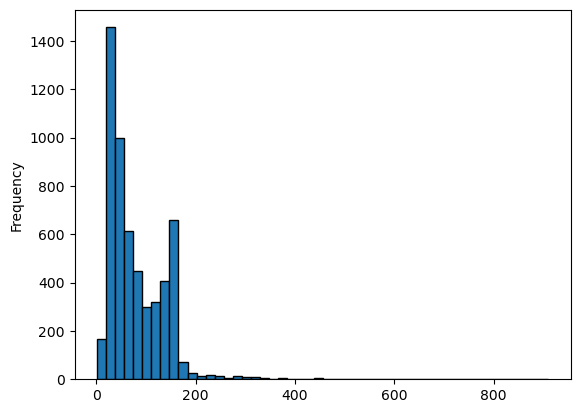

In [36]:
df['length'].plot.hist(bins=50,edgecolor='black')

In [38]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [40]:
# We use masking to find longest message, and iloc, to printout whole text message
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Investigating whether `message` length serves as a distinguishing factor between ham and spam.

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

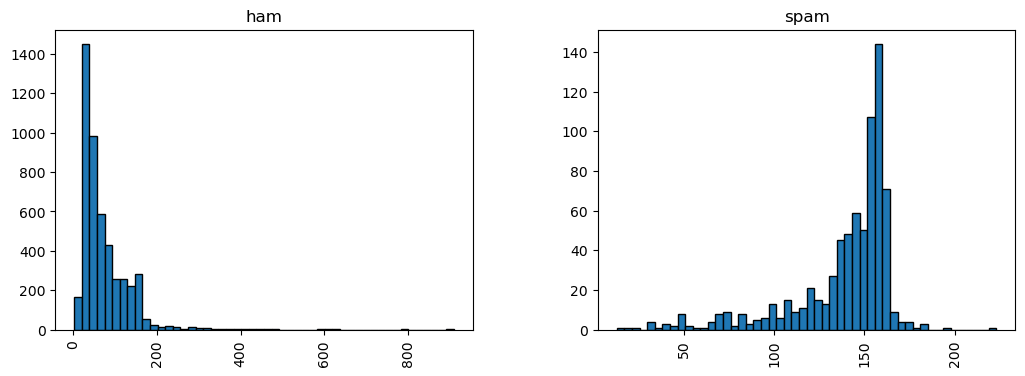

In [43]:
df.hist(column='length', by='label', bins=50,figsize=(12,4),edgecolor='black')

## Text Preprocessing

#### Bag of Words (BoW) Technique

The **Bag of Words (BoW)** is a simple and commonly used method for converting text into numerical features for machine learning tasks.

#### Concept:
- BoW represents a document as a collection of words, ignoring grammar, word order, or context.
- The idea is to create a **vocabulary** of all unique words across the dataset and represent each document as a vector based on word occurrences or frequencies.
- The result is a **sparse vector** where each position corresponds to a word in the vocabulary.

#### Steps in BoW:
1. **Tokenization**: Split the text into words.
2. **Build Vocabulary**: Create a set of unique words from the dataset.
3. **Vectorization**: Represent each document as a vector indicating the count (or presence) of words from the vocabulary.
Preview in Jupyter Notebook:


In [47]:
import string

In [49]:
# A Simple Sample to Remove Punctuation
mess='Sample message! Notice: it has punctuation.'

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
no_punct = mess.translate(str.maketrans('', '', string.punctuation))
no_punct

'Sample message Notice it has punctuation'

In [55]:
no_punc=[c for c in mess if c not in string.punctuation]

In [57]:
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [59]:
# Remove stop words
from nltk.corpus import stopwords

In [61]:
len(stopwords.words('english'))

179

In [63]:
no_punc=''.join(no_punc)

In [65]:
no_punc

'Sample message Notice it has punctuation'

In [67]:
x = ['a', 'b', 'c', 'd']
'+'.join(x)

'a+b+c+d'

In [69]:
no_punc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [71]:
clean_mess=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [73]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [75]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [77]:
x=text_process('this is it, my darling shabnam!')

In [79]:
x

['darling', 'shabnam']

In [81]:
# Tokenizing messages
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

### Steps for Text Vectorization Using the Bag-of-Words Model:

1. **Count Term Frequency (TF):**  
   Calculate how many times each word appears in a message. This is known as **term frequency**.

2. **Apply Inverse Document Frequency (IDF):**  
   Adjust the term frequencies by weighting them, so that frequently occurring words across all messages are given lower importance. This is called **inverse document frequency**.

3. **Normalize the Vectors (L2 Norm):**  
   Scale the resulting vectors to unit length, ensuring that the representation is independent of the original text length. This is done using the **L2 norm**.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
bow_transformer = CountVectorizer (analyzer=text_process) .fit (df ['message'])

In [88]:
print(len(bow_transformer.vocabulary_))

11425


Getting Bag of words count as a vector 

In [90]:
mess4=df['message'][3]

In [94]:
print(mess4)

U dun say so early hor... U c already then say...


In [96]:
bow4=bow_transformer.transform([mess4])

In [98]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [100]:
 bow_transformer.get_feature_names_out()[9554]

'say'

In [102]:
messages_bow=bow_transformer.transform(df['message'])

In [103]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


The numnber of non-zero data in sparse matrix

In [105]:
print('Non-zero occurrences of Sparse Matrix: ',len(messages_bow.data==1))

Non-zero occurrences of Sparse Matrix:  50548


In [106]:
print('Non-zero occurrences of Sparse Matrix: ',messages_bow.nnz)


Non-zero occurrences of Sparse Matrix:  50548


In [107]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity))) 
# format(round(sparsity)))

sparsity: 0.07940295412668218


TF-IDF

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer

In [114]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [116]:
tfidf4=tfidf_transformer.transform(bow4)

In [120]:
print(tfidf4)

  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


Checking Inverse document frequency of a particular word

In [124]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [127]:
# To convert the entire bag-of-words corpus into a TF-IDF corpus in one step:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [129]:
from sklearn.naive_bayes import MultinomialNB

In [134]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,df['label'])

In [136]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [142]:
# First item by [0]
spam_detect_model.predict(tfidf4)[0]

'ham'

In [140]:
# Original DATA looks like we predicted correctly
df['label'][3]

'ham'

In [144]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [146]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [148]:
from sklearn.model_selection import train_test_split

In [227]:
X=df['message']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [182]:
print(len(X_train), len(y_test), len(X_train) + len(y_test))

4457 1115 5572


In [229]:
from sklearn.pipeline import Pipeline

In [231]:
pipeline= Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())   
])

In [233]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x12b4dccc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [237]:
predictions=pipeline.predict(X_test)

In [190]:
from sklearn.metrics import classification_report

In [239]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       955
        spam       1.00      0.69      0.82       160

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



#### Random Forest implementation as the classifier on Scikitlearn Pipeline

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
pipeline= Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())   
])

In [246]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x12b4dccc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [248]:
predictions=pipeline.predict(X_test)

In [254]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       955
        spam       1.00      0.69      0.82       160

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



# Second Walk Through

In [1]:
import numpy as np
import pandas as pd

In [3]:
yelp = pd.read_csv('yelp.csv')

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

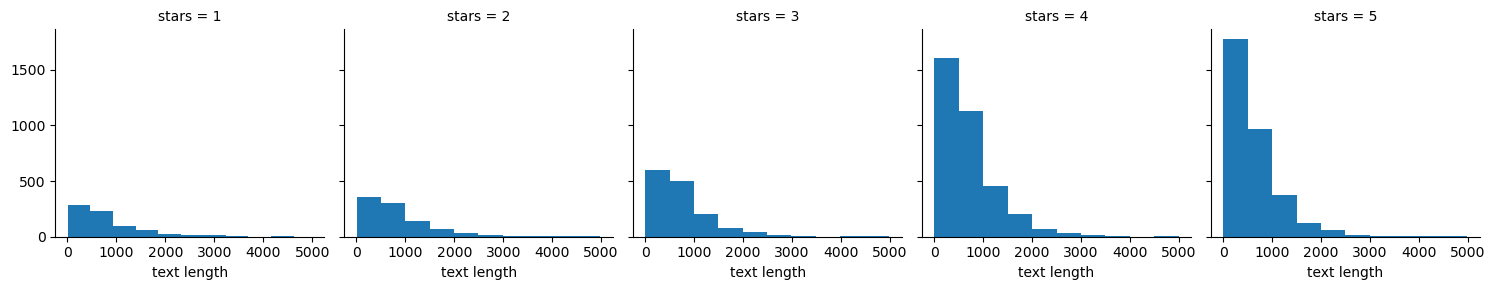

In [25]:
# Create a new column 'text length' in your DataFrame
yelp['text length'] = yelp['text'].apply(len)

# Create the FacetGrid and plot the histograms
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length')
plt.show

**Create a boxplot of text length for each star category.**

/var/folders/z_/srqbcrjd38n00h_v2pystqp80000gn/T/ipykernel_24551/3599291130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')


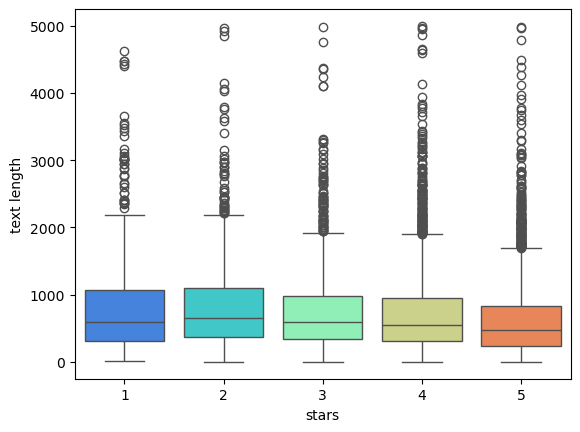

In [43]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')
plt.show()

**Create a countplot of the number of occurrences for each type of star rating.**

/var/folders/z_/srqbcrjd38n00h_v2pystqp80000gn/T/ipykernel_24551/3110122410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=yelp,palette='rainbow')


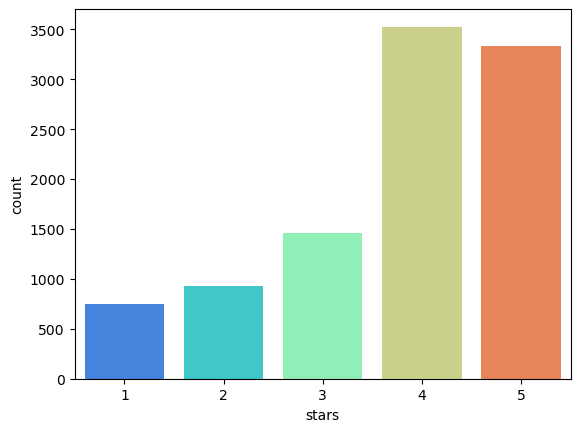

In [52]:
sns.countplot(x='stars',data=yelp,palette='rainbow')
plt.show()

**Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

**Solution:**

* calculating the mean only for numeric columns: by selecting only the numeric columns before applying mean():


In [59]:
numeric_columns = yelp.select_dtypes(include=['number'])
stars = numeric_columns.groupby('stars').mean()
print(stars)

           cool    useful     funny  text length
stars                                           
1      0.576769  1.604806  1.056075   826.515354
2      0.719525  1.563107  0.875944   842.256742
3      0.788501  1.306639  0.694730   758.498289
4      0.954623  1.395916  0.670448   712.923142
5      0.944261  1.381780  0.608631   624.999101


In [64]:
# stars = yelp[['stars', 'other_numeric_column']].groupby('stars').mean()
# print(stars)